In [146]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [48]:
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data['price'] = pd.Series(boston.target)

In [36]:
data.shape

(506, 13)

In [17]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


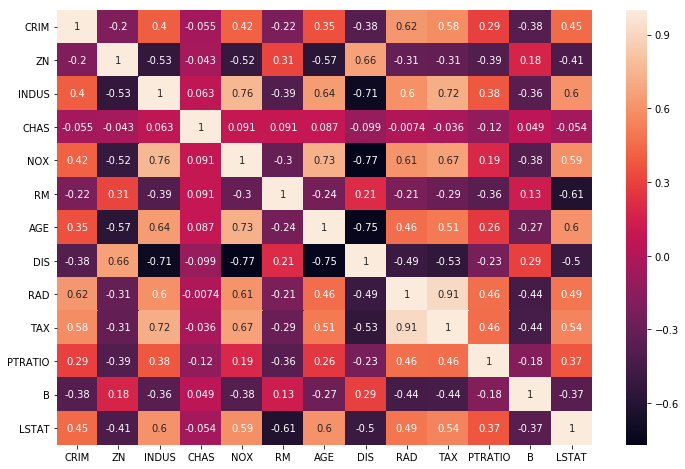

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

`Inference:`
    1. RM and LSAT, AGE and DIS, DIS and NOX etc have negative high correlation

In [49]:
y = data.pop('price')
X = data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

## Multivariate Linear Regression

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

In [53]:
print(r2_score(y_test, y_pred_test))

0.6955388005506375


In [54]:
print(r2_score(y_train, y_pred_train))

0.7551332741779997


## Manual Feature Elimination

In [105]:
## calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

   Features    VIF
10  PTRATIO  84.71
4       NOX  81.90
5        RM  74.87
9       TAX  69.94
11        B  21.57
6       AGE  19.54
8       RAD  18.25
7       DIS  15.80
2     INDUS  13.86
12    LSTAT  11.24
1        ZN   2.74
0      CRIM   2.08
3      CHAS   1.13


In [88]:
def getVif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

## Manual Feature Elimination

In [126]:
col = X.columns
X_train_lm = sm.add_constant(X_train[col])

In [127]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [128]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           6.06e-91
Time:                        21:47:07   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.0

In [129]:
getVif(col)

,Features,VIF
10,PTRATIO,84.71
4,NOX,81.90
5,RM,74.87
9,TAX,69.94
11,B,21.57
6,AGE,19.54
8,RAD,18.25
7,DIS,15.80
2,INDUS,13.86
12,LSTAT,11.24


In [130]:
# 1. High p and high vif
# 2. High p and low vif
# 3. Low p and high vif

In [131]:
col = col.drop('INDUS')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     83.74
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           6.89e-92
Time:                        21:47:07   Log-Likelihood:                -984.98
No. Observations:                 339   AIC:                             1996.
Df Residuals:                     326   BIC:                             2046.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9193      5.819      5.657      0.0

,Features,VIF
9,PTRATIO,83.01
3,NOX,75.44
4,RM,72.13
8,TAX,58.75
10,B,21.47
5,AGE,19.51
7,RAD,17.11
6,DIS,14.83
11,LSTAT,11.22
1,ZN,2.72


In [132]:
col = col.drop('AGE')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     91.41
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           9.40e-93
Time:                        21:47:08   Log-Likelihood:                -985.28
No. Observations:                 339   AIC:                             1995.
Df Residuals:                     327   BIC:                             2040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2722      5.798      5.739      0.0

,Features,VIF
8,PTRATIO,82.93
3,NOX,69.84
4,RM,68.98
7,TAX,58.72
9,B,21.47
6,RAD,17.01
5,DIS,13.10
10,LSTAT,10.05
1,ZN,2.68
0,CRIM,2.08


In [133]:
col = col.drop('CHAS')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.17e-93
Time:                        21:47:08   Log-Likelihood:                -985.54
No. Observations:                 339   AIC:                             1993.
Df Residuals:                     328   BIC:                             2035.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2538      5.793      5.740      0.0

,Features,VIF
7,PTRATIO,82.72
3,RM,68.98
2,NOX,68.60
6,TAX,58.22
8,B,21.39
5,RAD,16.92
4,DIS,13.08
9,LSTAT,10.04
1,ZN,2.68
0,CRIM,2.07


In [134]:
col = col.drop('PTRATIO')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     94.16
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.53e-85
Time:                        21:47:08   Log-Likelihood:                -1007.4
No. Observations:                 339   AIC:                             2035.
Df Residuals:                     329   BIC:                             2073.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7898      4.925      1.988      0.0

,Features,VIF
2,NOX,68.54
6,TAX,54.14
3,RM,53.60
7,B,20.10
5,RAD,16.90
4,DIS,10.65
8,LSTAT,8.97
1,ZN,2.27
0,CRIM,2.07


In [135]:
col = col.drop('NOX')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           3.15e-86
Time:                        21:47:08   Log-Likelihood:                -1008.2
No. Observations:                 339   AIC:                             2034.
Df Residuals:                     330   BIC:                             2069.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9465      4.380      1.586      0.1

,Features,VIF
5,TAX,46.34
2,RM,30.95
6,B,18.90
4,RAD,16.71
3,DIS,8.99
7,LSTAT,6.74
1,ZN,2.25
0,CRIM,2.04


In [136]:
col = col.drop('TAX')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     110.7
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           8.61e-83
Time:                        21:47:09   Log-Likelihood:                -1018.9
No. Observations:                 339   AIC:                             2054.
Df Residuals:                     331   BIC:                             2084.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8715      4.164     -0.209      0.8

,Features,VIF
2,RM,25.33
5,B,18.60
3,DIS,8.98
6,LSTAT,5.68
4,RAD,4.70
1,ZN,2.24
0,CRIM,2.04


In [137]:
col = col.drop('RAD')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.44e-83
Time:                        21:47:39   Log-Likelihood:                -1019.6
No. Observations:                 339   AIC:                             2053.
Df Residuals:                     332   BIC:                             2080.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6788      4.109     -0.409      0.6

,Features,VIF
2,RM,20.95
4,B,17.41
3,DIS,8.75
5,LSTAT,4.90
1,ZN,2.24
0,CRIM,1.64


In [138]:
col = col.drop('RM')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.33e-66
Time:                        21:47:55   Log-Likelihood:                -1062.2
No. Observations:                 339   AIC:                             2136.
Df Residuals:                     333   BIC:                             2159.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1273      1.825     19.247      0.0

,Features,VIF
3,B,8.42
2,DIS,7.95
4,LSTAT,4.40
1,ZN,2.24
0,CRIM,1.61


In [139]:
col = col.drop('B')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           2.93e-66
Time:                        21:48:12   Log-Likelihood:                -1065.6
No. Observations:                 339   AIC:                             2141.
Df Residuals:                     334   BIC:                             2160.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7574      1.174     33.010      0.0

,Features,VIF
2,DIS,3.96
3,LSTAT,3.18
1,ZN,2.20
0,CRIM,1.61


In [145]:
print("R2 score of training dataset", r2_score(y_train, lr.predict(X_train_lm)))

X_test_lm = sm.add_constant(X_test[col])
print("R2 score of test dataset", r2_score(y_test, lr.predict(X_test_lm)))

R2 score of training dataset 0.605946275985229
R2 score of test dataset 0.5967064180617359


`Inference: ` We derived to our final model to predict the price and it is represented as:
        price = -0.1554 * CRIM + 0.0969 * ZN - 1.3806 * DIS - 0.9205 * LSTAT + 38.7574
Also note that R2 score of training and test is also not that fuch. Therefore stating that our model is not overfitting.

## Automated Feature Elimination

In [162]:
# Creating sklearn linear regression model on all the features.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 8)
rfe = rfe.fit(X_train, y_train)

In [163]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CRIM', True, 1),
 ('ZN', False, 3),
 ('INDUS', True, 1),
 ('CHAS', True, 1),
 ('NOX', True, 1),
 ('RM', True, 1),
 ('AGE', False, 6),
 ('DIS', True, 1),
 ('RAD', False, 2),
 ('TAX', False, 4),
 ('PTRATIO', True, 1),
 ('B', False, 5),
 ('LSTAT', True, 1)]

In [164]:
col = X_train.columns[rfe.support_]
col

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [165]:
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           6.14e-89
Time:                        21:58:01   Log-Likelihood:                -1001.8
No. Observations:                 339   AIC:                             2022.
Df Residuals:                     330   BIC:                             2056.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1141      5.292      6.257      0.0

,Features,VIF
3,NOX,66.87
4,RM,65.72
6,PTRATIO,64.90
1,INDUS,11.19
7,LSTAT,9.96
5,DIS,9.47
0,CRIM,1.62
2,CHAS,1.11


In [166]:
print("R2 score of training dataset", r2_score(y_train, lr.predict(X_train_lm)))

X_test_lm = sm.add_constant(X_test[col])
print("R2 score of test dataset", r2_score(y_test, lr.predict(X_test_lm)))

R2 score of training dataset 0.7295046897351576
R2 score of test dataset 0.6865991941715893


`Inference: ` Note that the difference is significant between r squared. Therefore our model is not a good one. It is becuase after eliminating features using RFE there are still hihly correlated variables in the dataset.

## Manual and Automate approach

In [181]:
# Creating sklearn linear regression model on all the features.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [182]:
col = X_train.columns[rfe.support_]
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [183]:
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           6.36e-89
Time:                        22:03:37   Log-Likelihood:                -996.90
No. Observations:                 339   AIC:                             2016.
Df Residuals:                     328   BIC:                             2058.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.7647      5.739      6.580      0.0

,Features,VIF
8,PTRATIO,76.50
5,RM,71.00
4,NOX,68.61
6,DIS,13.68
2,INDUS,11.57
9,LSTAT,9.98
7,RAD,5.44
1,ZN,2.60
0,CRIM,2.07
3,CHAS,1.11


In [184]:
col = col.drop('CHAS')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     101.8
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.40e-89
Time:                        22:03:38   Log-Likelihood:                -997.76
No. Observations:                 339   AIC:                             2016.
Df Residuals:                     329   BIC:                             2054.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8071      5.745      6.581      0.0

,Features,VIF
7,PTRATIO,76.15
4,RM,70.97
3,NOX,67.89
5,DIS,13.67
2,INDUS,11.56
8,LSTAT,9.97
6,RAD,5.43
1,ZN,2.60
0,CRIM,2.06


In [185]:
col = col.drop('INDUS')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           6.62e-90
Time:                        22:03:39   Log-Likelihood:                -999.48
No. Observations:                 339   AIC:                             2017.
Df Residuals:                     330   BIC:                             2051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9182      5.765      6.577      0.0

,Features,VIF
6,PTRATIO,72.42
3,RM,67.28
2,NOX,56.67
4,DIS,12.84
7,LSTAT,9.94
5,RAD,5.26
1,ZN,2.60
0,CRIM,2.06


In [186]:
col = col.drop('ZN')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           3.58e-90
Time:                        22:04:15   Log-Likelihood:                -1001.4
No. Observations:                 339   AIC:                             2019.
Df Residuals:                     331   BIC:                             2049.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9070      5.766      6.748      0.0

,Features,VIF
2,RM,63.58
5,PTRATIO,62.50
1,NOX,56.64
6,LSTAT,9.94
3,DIS,8.65
4,RAD,5.18
0,CRIM,2.05


In [187]:
col = col.drop('RM')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           3.56e-77
Time:                        22:04:28   Log-Likelihood:                -1034.7
No. Observations:                 339   AIC:                             2083.
Df Residuals:                     332   BIC:                             2110.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.9184      4.298     17.432      0.0

,Features,VIF
4,PTRATIO,47.98
1,NOX,33.73
5,LSTAT,7.46
2,DIS,7.13
3,RAD,4.94
0,CRIM,2.03


In [188]:
col = col.drop('PTRATIO')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     92.24
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.02e-60
Time:                        22:04:34   Log-Likelihood:                -1076.1
No. Observations:                 339   AIC:                             2164.
Df Residuals:                     333   BIC:                             2187.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.5337      3.270     13.617      0.0

,Features,VIF
1,NOX,12.63
4,LSTAT,7.28
3,RAD,4.84
2,DIS,3.36
0,CRIM,2.03


In [189]:
col = col.drop('RAD')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     115.5
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.03e-61
Time:                        22:04:44   Log-Likelihood:                -1076.2
No. Observations:                 339   AIC:                             2162.
Df Residuals:                     334   BIC:                             2182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9073      3.195     14.056      0.0

,Features,VIF
1,NOX,10.05
3,LSTAT,7.20
2,DIS,3.13
0,CRIM,1.59


In [190]:
col = col.drop('NOX')
X_train_lm = sm.add_constant(X_train[col])
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())
getVif(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           1.27e-61
Time:                        22:04:56   Log-Likelihood:                -1079.1
No. Observations:                 339   AIC:                             2166.
Df Residuals:                     335   BIC:                             2181.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8627      1.207     31.364      0.0

,Features,VIF
2,LSTAT,2.68
1,DIS,1.92
0,CRIM,1.58


Model: price = -0.1263 * CRIM - 0.9695 * LSTAT - 0.7227 * DIS  + 37.8627